In [109]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Portfolio Part 3 - Analysis of Mobile Price Data (2024 S1)

In this Portfolio task, you will work on a new dataset named 'Mobile Price Data', it contains numerous details about mobile phone hardware, specifications, and prices. Your main task is to train classification models to predict **mobile phone prices** ('price range' in the dataset)and evaluate the strengths and weaknesses of these models.

Here's the explanation of each column:

|Column|Meaning|
|:-----:|:-----:|
|battery power|Total energy a battery can store in one time measured in mAh|
|blue|Has bluetooth or not|
|clock speed|speed at which microprocessor executes instructions|
|dual sim|Has dual sim support or not|
|fc|Front Camera mega pixels|
|four g|Has 4G or not|
|int memory|Internal Memory in Gigabytes|
|m dep|Mobile Depth in cm|
|mobile wt|Weight of mobile phone|
|n cores|Number of cores of processor|
|pc|Primary Camera mega pixels|
|px height|Pixel Resolution Height|
|px width|Pixel Resolution Width|
|ram|Random Access Memory in Mega Bytes|
|sc h|Screen Height of mobile in cm|
|sc w|Screen Width of mobile in cm|
|talk time|longest time that a single battery charge will last when you are|
|three g|Has 3G or not|
|touch screen|Has touch screen or not|
|wifi|Has wifi or not|
|price range|This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost)|

Blue, dual sim, four g, three g, touch screen, and wifi are all binary attributes, 0 for not and 1 for yes.

Your high level goal in this notebook is to build and evaluate predictive models for 'price range' from other available features. More specifically, you need to **complete the following major steps**:

1. ***Explore the data*** and ***clean the data if necessary***. For example, remove abnormal instanaces and replace missing values.

2. ***Study the correlation*** between 'price range' with other features. And ***select the variables*** that you think are helpful for predicting the price range. We do not limit the number of variables.

3. ***Split the dataset*** (Training set : Test set = 8 : 2)

4. ***Train a logistic regression model*** to predict 'price range' based on the selected features (from the second step). ***Calculate the accuracy*** of your model. (You are required to report the accuracy from both training set and test set.) ***Explain your model and evaluate its performance*** (Is the model performing well? If yes, what factors might be contributing to the good performance of your model? If not, how can improvements be made?).

5. ***Train a KNN model*** to predict 'price range' based on the selected features (you can use the features selected from the second step and set K with an ad-hoc manner in this step. ***Calculate the accuracy*** of your model. (You are required to report the accuracy from both training set and test set.)

6. ***Tune the hyper-parameter K*** in KNN (Hints: GridsearchCV), ***visualize the results***, and ***explain*** how K influences the prediction performance.

  Hints for visualization: You can use line chart to visualize K and mean accuracy scores on test set.

Note 1: In this assignment, we no longer provide specific guidance and templates for each sub task. You should learn how to properly comment your notebook by yourself to make your notebook file readable.

Note 2: You will not being evaluated on the accuracy of the model but on the process that you use to generate it and your explanation.

In [111]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import DecisionBoundaryDisplay


sns.set_theme()
%matplotlib inline

# **1. Clean the data set**

In [112]:
df = pd.read_csv('/content/drive/MyDrive/BA - Session 1 - 2024/COMP6200/Portfolio 3/Mobile_Price_Data.csv')
df.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7.0,0.6,188,2,...,20,756.0,2549.0,9,7,19,0.0,0,1,1
1,1021,1,0.5,1,0,1,53.0,0.7,136,3,...,905,1988.0,2631.0,17,3,7,1.0,1,0,2
2,563,1,0.5,1,2,1,41.0,0.9,145,5,...,1263,1716.0,2603.0,11,2,9,1.0,1,0,2
3,615,1,2.5,0,0,0,10.0,0.8,131,6,...,1216,1786.0,2769.0,16,8,11,1.0,0,0,2
4,1821,1,1.2,0,13,1,44.0,0.6,141,2,...,1208,1212.0,1411.0,8,2,15,1.0,1,0,1
5,1859,0,0.5,1,3,0,22.0,0.7,164,1,...,1004,1654.0,1067.0,17,1,10,1.0,0,0,1
6,1821,0,1.7,0,4,1,10.0,0.8,139,8,...,381,1018.0,3220.0,13,8,18,1.0,0,1,3
7,1954,0,0.5,1,0,0,24.0,0.8,187,4,...,512,NaN,700.0,16,3,5,1.0,1,1,0
8,1445,1,0.5,0,0,0,53.0,0.7,174,7,...,386,836.0,1099.0,17,1,20,1.0,0,0,0
9,509,1,0.6,1,2,1,9.0,0.1,93,5,...,1137,1224.0,513.0,19,10,12,1.0,0,0,0


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     1999 non-null   float64
 7   m_dep          1999 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       1999 non-null   float64
 13  ram            1999 non-null   float64
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        1999 non-null   float64
 18  touch_sc

Most of data types are interger and float, which are appropiate for the data analysis.

In [114]:
df.shape

(2000, 21)

In [115]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       1
m_dep            1
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         1
ram              1
sc_h             0
sc_w             0
talk_time        0
three_g          1
touch_screen     0
wifi             0
price_range      0
dtype: int64

It can be seen here that there are na values existed in the column 'int_memory', 'm_dep', 'px_width', 'ram', 'three_g'. Then, we need to clean those column and remove the duplicates.

In [116]:
print(df.duplicated().sum())

0


In [117]:
# Remove the missing values
columns_to_check = ['int_memory', 'm_dep', 'px_width', 'ram', 'three_g']
df_cleaned = df.dropna(subset=columns_to_check)

In [118]:
df_cleaned.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
df_cleaned.shape

(1995, 21)

# **2. Observe the correlation and set the variables**

In [119]:
# Calculate the correlation matrix
correlation_matrix = df_cleaned.corr()

# Extract the correlations related to 'price_range'
price_range_correlations = correlation_matrix['price_range'].sort_values(ascending=False)

price_range_correlations

price_range      1.000000
ram              0.917131
battery_power    0.202652
px_width         0.164763
px_height        0.147946
int_memory       0.043861
sc_w             0.037330
pc               0.031831
three_g          0.023771
sc_h             0.023067
talk_time        0.022085
blue             0.020846
wifi             0.020394
fc               0.019327
dual_sim         0.018153
four_g           0.014572
n_cores          0.003573
m_dep            0.000776
clock_speed     -0.006926
mobile_wt       -0.028663
touch_screen    -0.031155
Name: price_range, dtype: float64

Based on this analysis, the features I would select for predicting price_range are: 'ram', 'battery_power', 'px_width', 'px_height'

# **3. Splitting the data**

In [120]:
X = df_cleaned[['ram', 'battery_power', 'px_width', 'px_height']]
y = df_cleaned['price_range']

# Splitting the data into training and test sets (Training set : Test set = 8 : 2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the size of X_train and X_test
print("Size of train is:", len(X_train))
print("Size of test is:", len(X_test))

Size of train is: 1596
Size of test is: 399


# **4. Logistic Regression**

In [121]:
# Initializing and training the logistic regression model
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [122]:
# Making predictions on the training set and test set
y_train_pred = log_reg_model.predict(X_train)
y_test_pred = log_reg_model.predict(X_test)

In [124]:
# Calculating accuracy for both the training set and test set
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Accuracy for training set: ", train_accuracy)
print("Acciracy for testing set: ", test_accuracy)

Accuracy for training set:  0.9605263157894737
Acciracy for testing set:  0.9674185463659147


In [125]:
# Predict the training and testing set
log_reg_model.predict(X_train)
log_reg_model.predict(X_test)

array([2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 3, 0, 2, 3, 2, 0, 3, 2, 0, 3, 3,
       3, 0, 1, 2, 3, 2, 2, 1, 0, 0, 0, 0, 2, 1, 1, 0, 1, 2, 0, 0, 3, 3,
       0, 1, 3, 1, 3, 2, 3, 1, 3, 3, 2, 3, 3, 0, 2, 2, 1, 0, 2, 3, 1, 3,
       0, 2, 2, 2, 3, 0, 3, 1, 0, 2, 0, 0, 0, 2, 0, 1, 2, 1, 1, 1, 2, 0,
       1, 1, 2, 1, 2, 1, 1, 1, 0, 3, 1, 2, 2, 1, 0, 2, 1, 2, 1, 2, 3, 3,
       2, 1, 3, 1, 1, 0, 3, 1, 3, 2, 0, 1, 1, 0, 0, 0, 2, 3, 3, 3, 1, 2,
       1, 3, 0, 0, 3, 3, 0, 1, 2, 0, 3, 2, 0, 2, 3, 3, 0, 2, 3, 1, 2, 0,
       0, 1, 3, 3, 1, 3, 3, 0, 1, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 0, 1, 2,
       2, 2, 0, 3, 1, 0, 0, 2, 1, 3, 0, 2, 0, 3, 2, 2, 3, 3, 2, 3, 1, 3,
       1, 1, 1, 3, 2, 3, 2, 3, 0, 0, 3, 0, 1, 1, 2, 0, 0, 1, 1, 0, 1, 2,
       2, 1, 1, 0, 0, 2, 3, 0, 2, 2, 3, 0, 1, 3, 1, 2, 1, 1, 0, 0, 2, 1,
       1, 0, 2, 1, 2, 2, 0, 2, 1, 0, 2, 1, 2, 0, 3, 3, 1, 1, 0, 3, 0, 3,
       0, 3, 3, 1, 3, 2, 3, 0, 1, 0, 0, 0, 2, 3, 3, 0, 1, 2, 2, 0, 1, 3,
       2, 2, 3, 0, 3, 3, 3, 0, 0, 1, 1, 1, 2, 1, 2,

***Evaluation***
The higher the score is, the more accurate the model is. As the training and testing set accuracy are 96.05% and 96.74% respectively, the results indicate that the model performs quite good. Besides, there is a small gap in the accuracy scores, hence, there is no overfitting of the model.

# **5. KNN Model**

In [126]:
# Initialise the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [127]:
# Making predictions on the training and test sets
y_train_pred_knn = knn_model.predict(X_train)
y_test_pred_knn = knn_model.predict(X_test)

In [128]:
# Calculating the accuracy on the training and test sets
train_accuracy_knn = accuracy_score(y_train, y_train_pred_knn)
test_accuracy_knn = accuracy_score(y_test, y_test_pred_knn)

print("The accuracy of training set: ", train_accuracy_knn)
print("The accuracy of testing set: ", test_accuracy_knn)

The accuracy of training set:  0.9505012531328321
The accuracy of testing set:  0.9223057644110275


***Evaluation*** "n_neighbors = 5": 5 nearest neighbors from training set to make decision about the testing data, which indicate good accuracy (above 90%).

The accuracy scores are 95.05% for the training set and 92.23% for the testing set, which demonstrates good accuracy, indicating robust prediction capabilities for the mobile price range. Additionally, out of 100 predictions on the testing dataset, only 8 are incorrect, and for the training dataset, there are 5 errors per 100 predictions, which shows that the model still performs well with unseen data.

# **6. Tune the hyper-parameter K in KNN**

In [129]:
# Define the parameter grid
param_grid = {'n_neighbors': list(range(3, 100))}

# Create the KNN model
knn = KNeighborsClassifier()

In [131]:
# Setup the grid search
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', return_train_score=True)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                         24, 25, 26, 27, 28, 29, 30, 31, 32, ...]},
             return_train_score=True, scoring='accuracy')

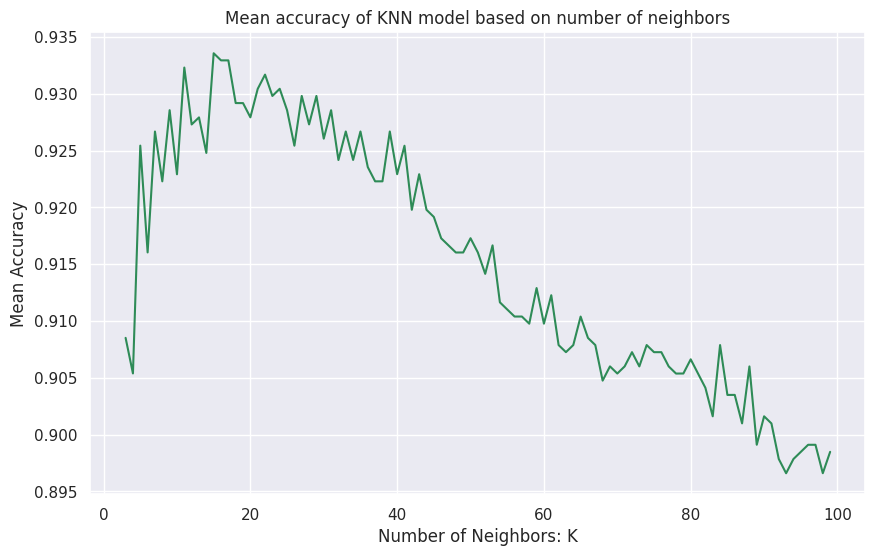

In [132]:
# Assuming grid_search was successful and cv_results_ are available
mean_test_scores = grid_search.cv_results_['mean_test_score']
k_values = list(range(3, 100))

plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_test_scores, color = 'seagreen')
plt.title('Mean accuracy of KNN model based on number of neighbors')
plt.xlabel('Number of Neighbors: K')
plt.ylabel('Mean Accuracy')
plt.grid(True)
plt.show()

**Accuracy test for KNN model**

In [133]:
# Extract the best score and the best parameter
best_score = grid_search.best_score_
best_knn = grid_search.best_params_['n_neighbors']

print("The best score is: ", best_score)
print("The best K value is: ", best_knn)

The best score is:  0.9335736677115987
The best K value is:  15


In [134]:
# Make the prediction for the KNN training and testing set
best_KNN = KNeighborsClassifier(n_neighbors= best_knn)
best_KNN.fit(X_train, y_train)

train_knn_predict = best_KNN.predict(X_train)
test_knn_predict = best_KNN.predict(X_test)

In [135]:
# Calculate the accuraacy of the KNN training and testing set
train_accuracy = accuracy_score(y_train, train_knn_predict)
test_accuracy = accuracy_score(y_test, test_knn_predict)

print("The accuracy score of train dataset is", train_accuracy)
print("The accuracy score of test dataset is", test_accuracy)

The accuracy score of train dataset is 0.9517543859649122
The accuracy score of test dataset is 0.9423558897243107


***Evaluation***

Based on the chart, there is the downward trend in the accuracy of KNN model based n K values. Initially, accuracy surges, peaking when K is low, which suggests a good fit for the data. However, as K increases, accuracy declines, indicating the model begins to underfit. The optimal K is where accuracy is high with minimal variance before the downward trend.

The KNN model's training accuracy of 95.17% and test accuracy of 94.24% indicate a strong performance with excellent generalisation from training to unseen data. The slight decrease from training to testing suggests the model is not overfitting. These high accuracy levels reflect a well-tuned model with a good balance between bias and variance, especially considering the complexity of classifying price ranges.


In conclusion, the best K value for this dataset is 15 and this model perfoms better and has more accurate results (95,17% and 94.24%) when comparing to the previous n_neighbors=5 (accuracy is 95.05% and 92.23%).